1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST
2. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.
3. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1186]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.11.0
TensorFlow 2.0 Hello World


# Классификация изображений одежды

In [1187]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [1188]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [1189]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

In [1190]:
train_images.shape

(60000, 28, 28)

In [1191]:
len(train_labels)

60000

In [1192]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [1193]:
test_images.shape

(10000, 28, 28)

In [1194]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

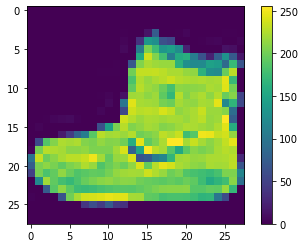

In [1195]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Нормализация входных данных

In [1196]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

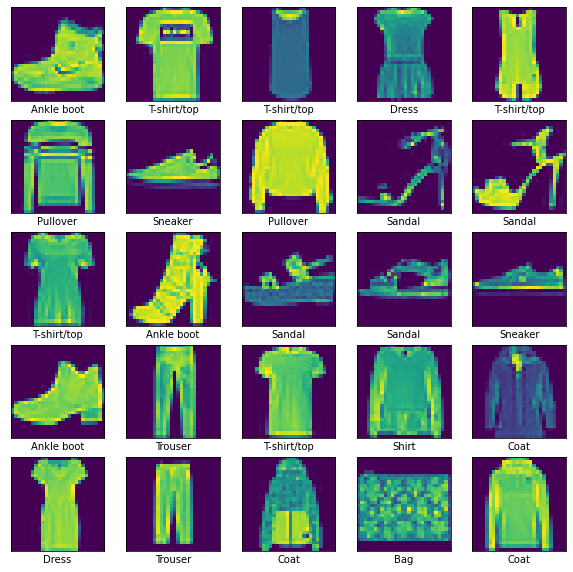

In [1197]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

In [1198]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='tanh'), #уменьшил количество нейронов в слое
    keras.layers.Dense(10)
])

In [1199]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), #увеличил скорость обучения оптимизатора
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [1200]:
model.fit(train_images, train_labels, epochs=60,batch_size=5000,verbose=0) #увеличил количество эпох, установил размер батча 

In [1201]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) #увеличение метрики на 0.02

313/313 - 0s - loss: 0.3710 - accuracy: 0.8750 - 475ms/epoch - 2ms/step

Test accuracy: 0.875


In [1202]:
boston = tf.keras.datasets.boston_housing

In [1203]:
(X_train, y_train), (X_test, y_test) = boston.load_data()

## Preprocess the data

In [1204]:
X_train.shape # 13 признаков, 404 значения (в тренировочной выборке)

(404, 13)

In [1205]:
y_train # таргетное значение - цены

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## Нормализация данных

In [1206]:
def normalize(x):
    return ((x - np.mean(x))/np.std(x))

In [1207]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [1208]:
min_y = y_train.min()
max_y = y_train.max() - min_y
y_train = (y_train - min_y) / max_y
y_test = (y_test - min_y) / max_y

## Создание модели

In [1209]:
model_regression = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_regression.summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_288 (Dense)           (None, 64)                896       
                                                                 
 dense_289 (Dense)           (None, 64)                4160      
                                                                 
 dense_290 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [1210]:
model_regression.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [1211]:
model_regression.fit(X_train, y_train, epochs=100,verbose=0,validation_split=0.1)

In [1212]:
test_loss, test_acc = model_regression.evaluate(X_test,  y_test, verbose=2)

print('\nTest MAE:', test_acc)

4/4 - 0s - loss: 0.0209 - mae: 0.0989 - 20ms/epoch - 5ms/step

Test MAE: 0.0989452451467514


In [1213]:
# делаем предсказания
pred = model_regression.predict(X_test).flatten()

4/4 [==============================] - 0s 1ms/step


In [1214]:
pred

array([0.08822853, 0.28372553, 0.40201062, 0.4309177 , 0.40932205,
       0.29251522, 0.4773385 , 0.430814  , 0.44560382, 0.29290122,
       0.21339357, 0.3670713 , 0.24168065, 0.5757808 , 0.25278035,
       0.39048642, 0.38249376, 0.3333442 , 0.2803821 , 0.3245237 ,
       0.19616784, 0.12495474, 0.38611004, 0.31004468, 0.45974198,
       0.31424975, 0.40785483, 0.84884053, 0.11533337, 0.368088  ,
       0.32549948, 0.13988073, 0.50966394, 0.3805306 , 0.24205635,
       0.09232546, 0.27683428, 0.27767724, 0.2897334 , 0.60636187,
       0.55753386, 0.4324199 , 0.22985342, 0.42972064, 0.65082294,
       0.514242  , 0.59523004, 0.31309286, 0.34102386, 0.37248853,
       0.77108675, 0.31021014, 0.1527708 , 0.26735657, 0.4561446 ,
       0.4327533 , 0.19382557, 0.5078791 , 0.53251565, 0.45589998,
       0.3281288 , 0.24954657, 0.17255446, 0.3142958 , 0.40758827,
       0.4970135 , 0.23786332, 0.44759312, 0.16438447, 0.11870727,
       0.31476045, 0.4347716 , 0.31103143, 0.21757174, 0.41268

In [1215]:
pred = pred * max_y + min_y 

In [1216]:
y_test = y_test * max_y + min_y

In [1217]:
err = np.mean(abs(pred - y_test))
print(err)

4.452536042531332


In [1218]:
model_regression_2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_regression_2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01), loss='mse', metrics=['mae'])

model_regression_2.fit(X_train, y_train, epochs=100,verbose=0,validation_split=0.1)

test_loss, test_acc = model_regression_2.evaluate(X_test,  y_test, verbose=2)

print('\nTest MAE:', test_acc)

4/4 - 0s - loss: 596.1066 - mae: 22.6826 - 25ms/epoch - 6ms/step

Test MAE: 22.6826114654541


In [1219]:
pred = model_regression_2.predict(X_test).flatten()
pred = pred * max_y + min_y 
err = np.mean(abs(pred - y_test))
print(err)

4/4 [==============================] - 0s 3ms/step
4.405357929304534


In [1220]:
model_regression_3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_regression_3.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01), loss='mse', metrics=['mae'])

model_regression_3.fit(X_train, y_train, epochs=200,verbose=0,validation_split=0.2, batch_size=404)

test_loss, test_acc = model_regression_3.evaluate(X_test,  y_test, verbose=2)

print('\nTest MAE:', test_acc)

4/4 - 0s - loss: 595.7801 - mae: 22.6522 - 35ms/epoch - 9ms/step

Test MAE: 22.65221405029297


In [1221]:
pred = model_regression_3.predict(X_test).flatten()
pred = pred * max_y + min_y 
err = np.mean(abs(pred - y_test))
print(err)

4/4 [==============================] - 0s 2ms/step
6.12176960963829


In [1222]:
model_regression_4 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_regression_4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

model_regression_4.fit(X_train, y_train, epochs=10,verbose=0,validation_split=0.1)

test_loss, test_acc = model_regression_4.evaluate(X_test,  y_test, verbose=2)

print('\nTest MAE:', test_acc)

4/4 - 0s - loss: 597.3096 - mae: 22.6967 - 20ms/epoch - 5ms/step

Test MAE: 22.69667625427246


In [1223]:
pred = model_regression_4.predict(X_test).flatten()
pred = pred * max_y + min_y 
err = np.mean(abs(pred - y_test))
print(err)

4/4 [==============================] - 0s 2ms/step
5.481476190978407


**Самые точные предсказания продемонстрировала модель model_regression_2 (с ручной настройкой скорости обучения RMSProp и широким входным слоем)**